# 線形回帰モデル

In [1]:
!date

2019年 8月25日 日曜日 09時00分49秒 JST


In [2]:
%matplotlib inline
%matplotlib nbagg

import warnings
from copy import deepcopy

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

from scipy import stats, special

from matplotlib.animation import ArtistAnimation
from IPython.display import HTML, display

warnings.filterwarnings('ignore')
plt.style.use('seaborn-darkgrid')
plt.rcParams['image.cmap'] = 'viridis'
sns.set_context('talk')

# Data

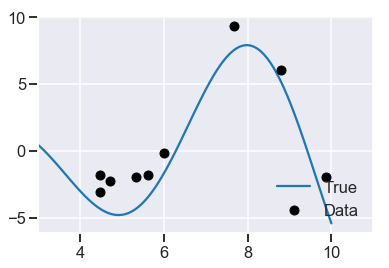

In [3]:
lb = 2
ub = 10
N = 10

x = np.linspace(lb, ub, 100)
y = np.sin(x) * x

x_data = (ub - lb) * np.random.random(N) + lb
y_data = x_data * np.sin(x_data) + np.random.random(N) * 3.

plt.plot(x, y, label='True')
plt.plot(x_data, y_data, 'ok', label='Data')
plt.xlim([lb + 1, ub + 1])
plt.legend(loc='lower right')
plt.show()

# Model

In [24]:
class LinearRegression:
    def __init__(self, lmd=10.0, m_w=[0, 0], lmd_w=[[1, 0], [0, 1]], d=4):
        
        if len(m_w) != len(lmd_w):
            raise 'Dim error'
            
        self.lmd = lmd
        self.m_w = np.array(m_w)
        self.lmd_w = np.array(lmd_w)
        self.d = d
        self.w = None
    
    def inference(self, x, y):
        # Convert x to features
        x = self.basis_fn(x)
        
        lmd_w = self.lmd_w
        self.lmd_w += self.lmd * np.dot(x.T, x)
        self.m_w = np.dot(
            np.linalg.inv(self.lmd_w),
            (self.lmd * np.sum(y[:, None] * x, axis=0)
             + np.dot(lmd_w, self.m_w)))

    def predict(self, x):
        x = self.basis_fn(x)
        
        # Update parameters
        mu = np.sum(self.m_w * x, axis=1)
        lmd = (self.lmd ** -1
               + np.dot(np.dot(x, np.linalg.inv(self.lmd_w)), x.T)) ** -1
        
        # Predict
        y_pred = np.random.multivariate_normal(mu, lmd ** -1)
        y_std = np.diag(lmd) ** -0.5
        return y_pred, y_std
    
    def sample_fn(self, x):
        x = self.basis_fn(x)
        self.w = np.random.multivariate_normal(self.m_w, self.lmd_w)
        y_pred = np.sum(self.w * x, axis=1)
        y_std = self.lmd ** -0.5
        return y_pred, y_std
    
    def sample_data(self, x):
        x = self.basis_fn(x)
        data = (np.random.randn(x.shape[0]) * self.lmd ** -1
                + np.sum(self.w * x, axis=1))
        return data
    
    def basis_fn(self, x):
        return np.array([x ** i for i in range(self.d)]).T

## 学習前の状態で重みパラメータをサンプルした例

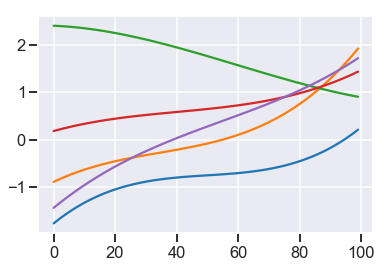

In [25]:
x = np.linspace(-1., 1., 100)
lr = LinearRegression(lmd=10.0, m_w=np.zeros(4), lmd_w=np.eye(4))

plt.figure()
for _ in range(5):
    y, _ = lr.sample_fn(x)
    plt.plot(y)
plt.show()

## 適当にサンプルした関数からデータをサンプルする

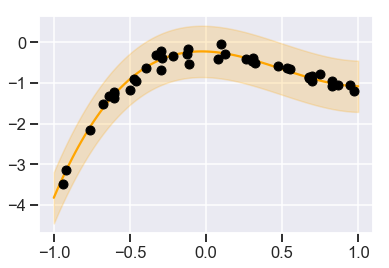

In [31]:
lr = LinearRegression(lmd=10.0, m_w=np.zeros(4), lmd_w=np.eye(4))

x_gen = 2 * np.random.rand(40) - 1
y_pred, y_std = lr.sample_fn(x)
y_gen = lr.sample_data(x_gen)

plt.figure()
plt.plot(x, y_pred, color='orange', label='Prediction')
plt.fill_between(x, y_pred - 2 * y_std, y_pred + 2 * y_std,
                 color='orange', alpha=0.2)
plt.plot(x_gen, y_gen, 'ok')
plt.show()

## データから推論

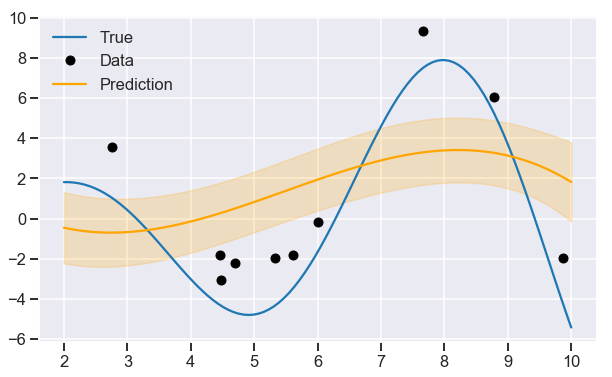

In [32]:
lr = LinearRegression(lmd=2.0, m_w=np.zeros(4), lmd_w=np.eye(4))
lr.inference(x_data, y_data)

x = np.linspace(lb, ub, 100)
y_pred, y_std = lr.predict(x)
y = np.sin(x) * x

plt.figure(figsize=(10, 6))
plt.plot(x, y, label='True')
plt.plot(x_data, y_data, 'ok', label='Data')
plt.plot(x, y_pred, color='orange', label='Prediction')
plt.fill_between(x, y_pred - 2 * y_std, y_pred + 2 * y_std,
                 color='orange', alpha=0.2)
plt.legend()
plt.show()

## 次元の異なる基底関数を用いる．

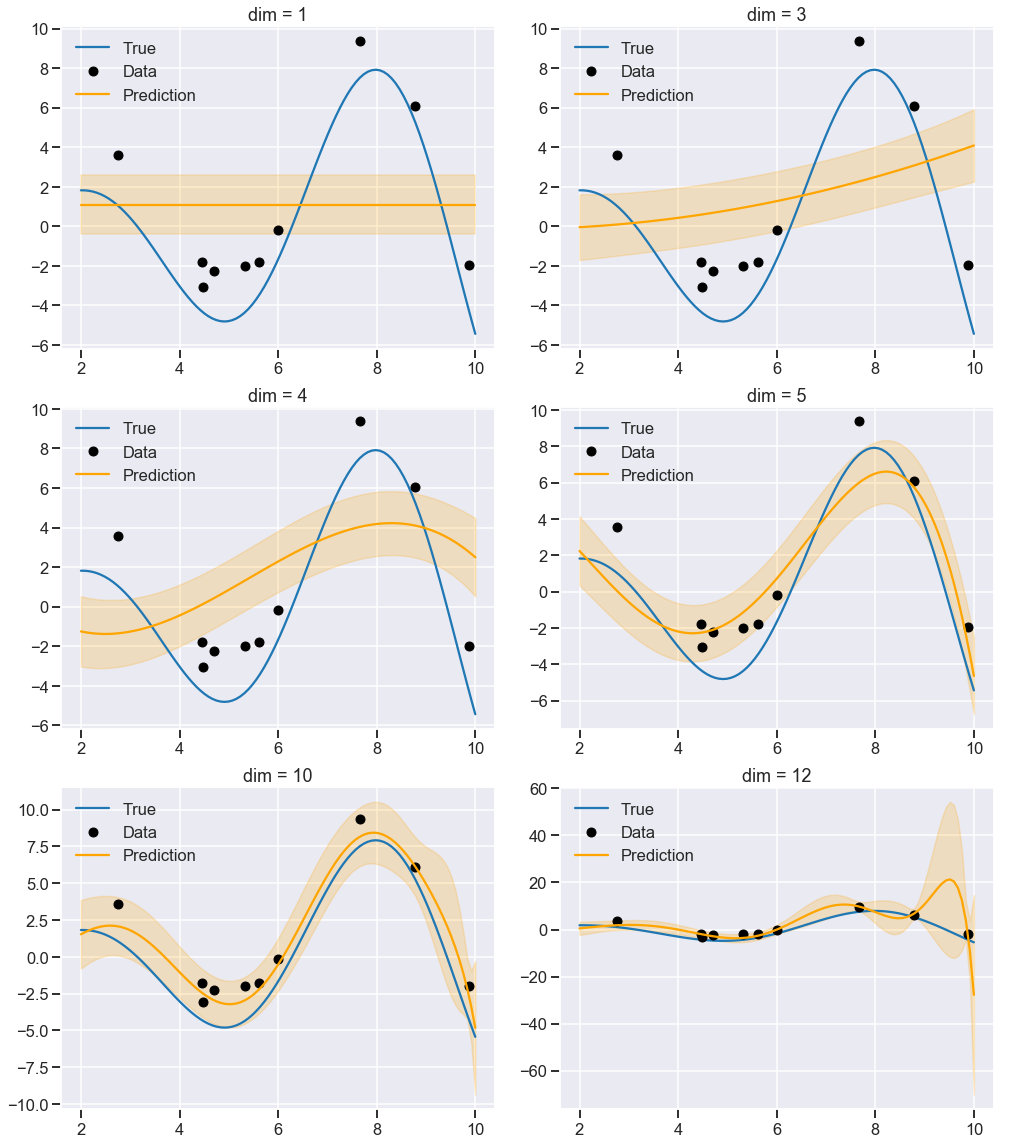

In [34]:
plt.figure(figsize=(14, 16))

for i, d in enumerate([1, 3, 4, 5, 10, 12]):
    lr = LinearRegression(lmd=2.0, m_w=np.zeros(d), lmd_w=np.eye(d), d=d)
    lr.inference(x_data, y_data)

    x = np.linspace(lb, ub, 100)
    y_pred, y_std = lr.predict(x)
    y = np.sin(x) * x

    plt.subplot(3, 2, i + 1)
    plt.plot(x, y, label='True')
    plt.plot(x_data, y_data, 'ok', label='Data')
    plt.plot(x, y_pred, color='orange', label='Prediction')
    plt.fill_between(x, y_pred - 2 * y_std, y_pred + 2 * y_std,
                     color='orange', alpha=0.2)
    plt.title(f'dim = {d}')
    plt.legend(loc='upper left')
    
plt.tight_layout()
plt.show()